In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

In [2]:
iris_data = load_iris()

# data set을 dataframe에 저장
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = pd.DataFrame(iris_data.target, columns=['class'])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
y_train = y_train.values.ravel()

model = RandomForestClassifier(n_estimators=100, max_depth=4) # n_estimators: 몇 개의 decision tree를 만들지 결정
model.fit(X_train, y_train)

y_test_predict = model.predict(X_test)
score = model.score(X_test, y_test)

importances = model.feature_importances_

print(score)
print(importances)

0.9
[0.07651237 0.01571664 0.37007758 0.53769341]


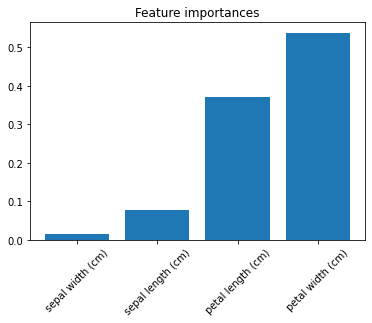

In [4]:
indices_sorted = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted], rotation=45)
plt.show()